# Linear Regression Analysis and Prediction for IoT

This notebook holds the Assignment 3.1 for Module 3 in AAI 530, Data Analytics and the Internet of Things. In this assignment, you will use linear regression to make predictions for simulated "streaming" data. The work that you do in this assignment will build on the linear regression predictions that you saw in your text book and in this week's lab session. Be sure to answer the analysis questions thoroughly, as this is a large part of the assignment for this week.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [38]:
#use this cell to import additional libraries or define helper functions
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Load and prepare your data

We'll be using the cleaned household electric consumption dataset from Module 2 in this assignment. I recommend saving your dataset by running df.to_csv("filename") at the end of the last assignment so that you don't have to re-do your cleaning steps. If you are not confident in your own cleaning steps, you may ask your instructor for a cleaned version of the data. You will not be graded on the cleaning steps in this assignment, but some functions may not work if you use the raw data.

We need to turn our datetime column into a numeric value to be used as a variable in our linear regression. In the lab session, we created a new column of minutes and just incremented the value by 10 since we knew that the readings occurred every 10 minutes. In this dataset, we have readings every minute, but we might have some missing rows depending on how you cleaned your data. So instead we will convert our datetime column to something called [unix/epoch time](https://en.wikipedia.org/wiki/Unix_time), which is the number of seconds since midnight on 1/1/1970.

**TODO: load your data and convert the datetime column into epoch/unix time**

In [39]:
#Load your data into a pandas dataframe here
df = pd.read_csv('household_power_consumption_cleaned.csv')

df.head()

C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\163398842.py:2: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption_cleaned.csv')


datetime        Date      Time Global_active_power  \
0  2006-12-16 17:24:00  16/12/2006  17:24:00               4.216   
1  2006-12-16 17:25:00  16/12/2006  17:25:00               5.360   
2  2006-12-16 17:26:00  16/12/2006  17:26:00               5.374   
3  2006-12-16 17:27:00  16/12/2006  17:27:00               5.388   
4  2006-12-16 17:28:00  16/12/2006  17:28:00               3.666   

  Global_reactive_power  Voltage Global_intensity Sub_metering_1  \
0                 0.418  234.840           18.400          0.000   
1                 0.436  233.630           23.000          0.000   
2                 0.498  233.290           23.000          0.000   
3                 0.502  233.740           23.000          0.000   
4                 0.528  235.680           15.800          0.000   

  Sub_metering_2  Sub_metering_3  
0          1.000        17.00000  
1          1.000        16.00000  
2          2.000        17.00000  
3          1.000        17.00000  
4          1.000        17.00000

In [40]:
#convert datetime to epoch/unix time
df['unix'] = pd.to_datetime(df['datetime']).view('int64') / 10**9

## Predicting Global Active Power

We will follow the code from the Chapter 9 in our textbook and the recorded lab session from this week to predict the Global Active Power (GAP) with linear regression.

First we will create our x (time) and y (GAP) training variables, and then define our model parameters.

**Q: What is ph? What is mu?**

A: the ph is the global active power, which we will be attempting to predict 5 minutes out. MU is going to be the gradient decent

**TODO: Set the ph to be 5 minutes--consider the units that our time column is measured in.**

In [41]:
ts = pd.DataFrame(df.unix)
ys = pd.DataFrame(df.Global_active_power)

ph = 5 * 60 
ph_index = ph // 60
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1) 
yp_pred = np.zeros(n_s-1)

**Q: With mu = 0.9, how much weight will our first data point have on the last (5000th) prediction in our limited dataset?**

A: $ 1.8126113170475857e-229 $

**TODO: Following the code from Chapter 10 and the lab session, use linear regression to predict a rolling GAP for our dataset. Store these predictions in the tp_pred and yp_pred lists created above for visualization.**

### The cell below will print the answer for the cell above

In [42]:
# given vals 
mu = 0.9
T = 5000
t = 1

# calc
weight = mu ** (T - t)
print(weight)

1.8126113170475857e-229


In [43]:
for i in range(2, n_s+1):
    # Selecting the subset of data up to the current point
    ts_tmp = ts.head(i)
    ys_tmp = ys.head(i)

    ns = len(ys_tmp)
    
    # Creating weights for each data point
    weights = np.ones(ns) * mu
    for k in range(ns):
        weights[k] = weights[k] ** (ns - k - 1)
    weights = np.flip(weights, 0)
    
    # Performing weighted linear regression
    model = LinearRegression()
    model.fit(ts_tmp, ys_tmp, sample_weight=weights)
    
    # Making a prediction for the next time point
    tp_pred[i-2] = ts.iloc[i-1] + ph
    yp_pred[i-2] = model.predict([[tp_pred[i-2]]])[0]

C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\1048740316.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tp_pred[i-2] = ts.iloc[i-1] + ph
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\1048740316.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tp_pred[i-2] = ts.iloc[i-1] + ph
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\1048740316.py:19: FutureWarning: Calling float on a single element Series is deprecated and wi

Now let's visualize the results from our model.

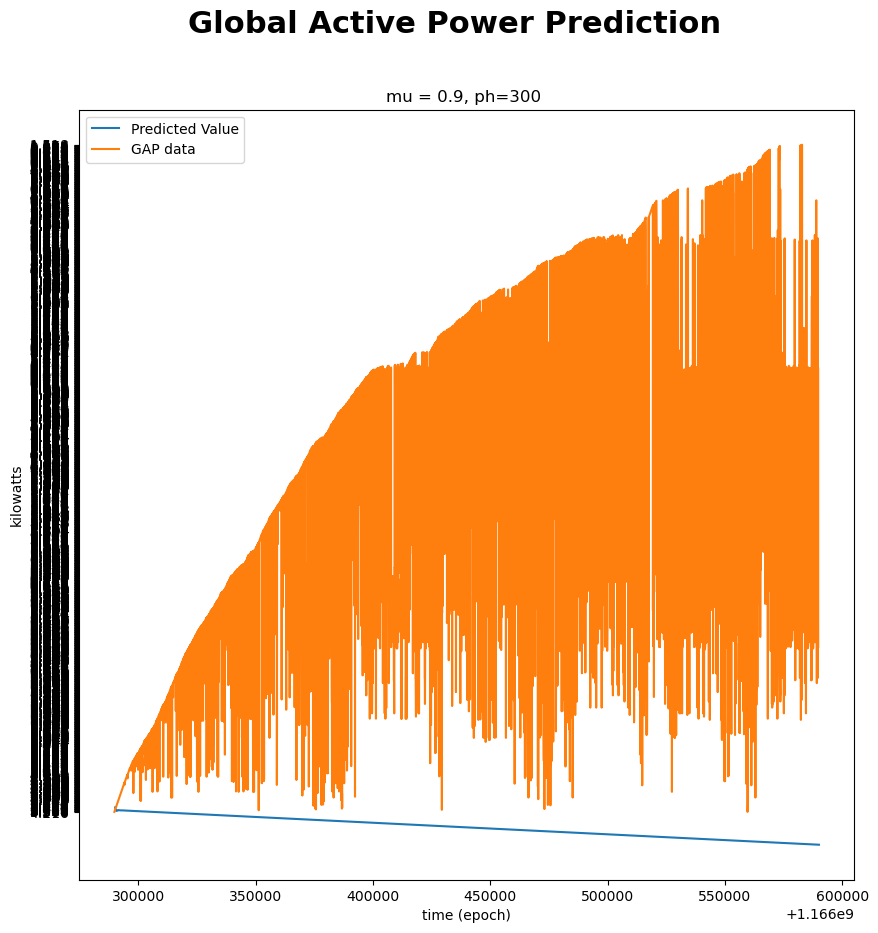

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value') 
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data') 
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

It's difficult to tell how the model is performing from this plot.

**TODO: Modify the code above to visualize the first and last 200 datapoints/predictions (can be in separate charts) and compute the MSE for our predictions.**

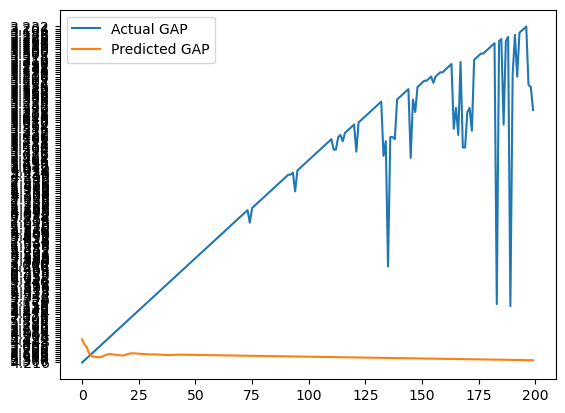

In [45]:
#Plot first 200 data points/predictions
yp_pred_df = pd.DataFrame(yp_pred, columns=['Predicted GAP'])

# Extracting the specific column for plotting
actual_gap = ys['Global_active_power'].iloc[:200]

# Plotting the first 200 data points
plt.plot(actual_gap, label='Actual GAP')
plt.plot(yp_pred_df.iloc[:200], label='Predicted GAP')
plt.legend()
plt.show()

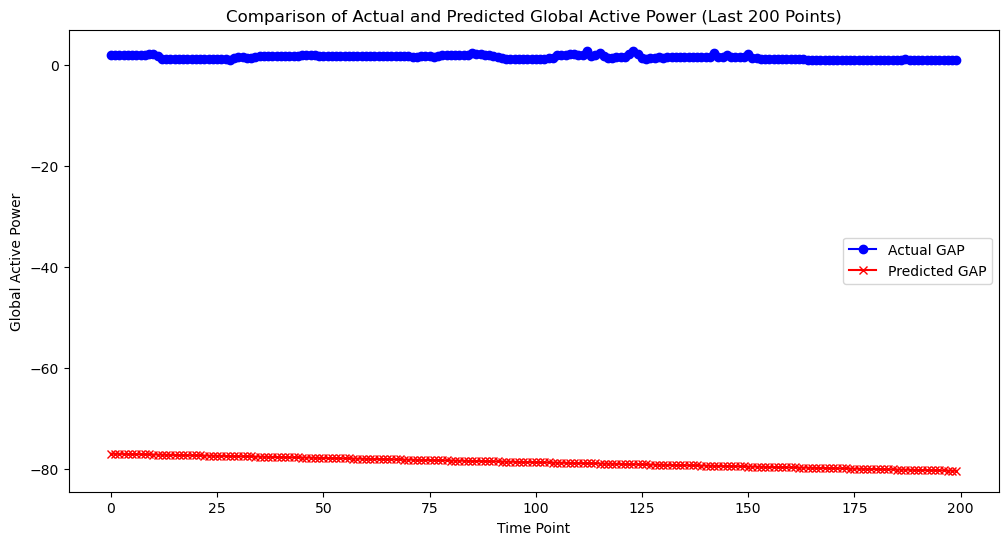

In [46]:
#Plot last 200 data points/predictions
actual_gap = ys['Global_active_power'].iloc[-200:]

# Plotting the last 200 data points
plt.figure(figsize=(12, 6))
plt.plot(actual_gap.reset_index(drop=True), label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred_df.iloc[-200:].reset_index(drop=True), label='Predicted GAP', color='red', marker='x')

plt.title('Comparison of Actual and Predicted Global Active Power (Last 200 Points)')
plt.xlabel('Time Point')
plt.ylabel('Global Active Power')
plt.legend()

plt.show()

In [47]:
# Calculate MSE of predictions
# Calculate MSE of predictions
actual_values = ys['Global_active_power'][ph_index:5000+ph_index-1]
predicted_values = yp_pred[:len(actual_values)]
mse_value = mean_squared_error(actual_values, predicted_values)

print("MSE is", mse_value)

MSE is 2147.765993381208


**Q: How did our model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: The Charts are showing way off. With that being said the MSE is very high, and the lower the MSE the better. 

**TODO: Re-run the prediction code with mu = 1 and mu = 0.01. Use the cells below to produce charts for the first and last 200 points and to compute the MSE for each of these sets of predictions.**

In [48]:
mu = 1
tp_pred_mu1 = np.zeros(n_s-1) 
yp_pred_mu1 = np.zeros(n_s-1)

for i in range(2, n_s+1):
    ts_tmp = ts.head(i)
    ys_tmp = ys.head(i)
    ns = len(ys_tmp)
    
    weights = np.array([mu ** (ns - k - 1) for k in range(ns)])
    
    model = LinearRegression()
    model.fit(ts_tmp, ys_tmp, sample_weight=weights)
    
    tp_pred_mu1[i-2] = ts.iloc[i-1] + ph
    yp_pred_mu1[i-2] = model.predict([[tp_pred_mu1[i-2]]])[0]

C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\541740017.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tp_pred_mu1[i-2] = ts.iloc[i-1] + ph
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\541740017.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tp_pred_mu1[i-2] = ts.iloc[i-1] + ph
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\541740017.py:15: FutureWarning: Calling float on a single element Series is deprecated a

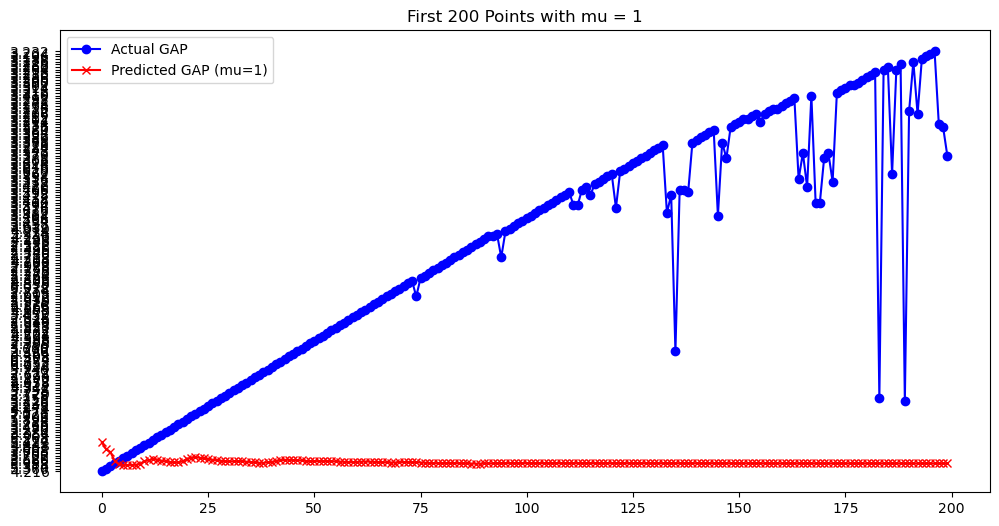

In [49]:
#Plot first 200 data points/predictions for mu = 1

plt.figure(figsize=(12, 6))
plt.plot(ys.iloc[:200, 0], label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred_mu1[:200], label='Predicted GAP (mu=1)', color='red', marker='x')
plt.title('First 200 Points with mu = 1')
plt.legend()
plt.show()

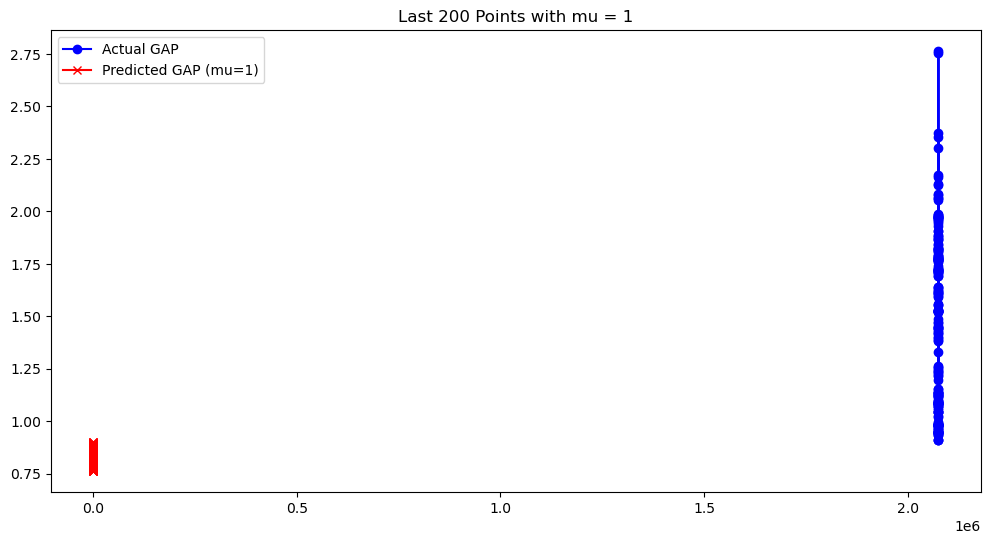

In [50]:
#Plot last 200 data points/predictions for mu = 1

plt.figure(figsize=(12, 6))
plt.plot(ys.iloc[-200:, 0], label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred_mu1[-200:], label='Predicted GAP (mu=1)', color='red', marker='x')
plt.title('Last 200 Points with mu = 1')
plt.legend()
plt.show()

In [51]:
#Calculate MSE of predictions for mu = 1

mse_mu1 = mean_squared_error(ys.iloc[ph_index:n_s+ph_index-1, 0], yp_pred_mu1)
print("MSE for mu = 1:", mse_mu1)

MSE for mu = 1: 1.4433474819579446


In [52]:
mu = 0.01
tp_pred_mu01 = np.zeros(n_s-1) 
yp_pred_mu01 = np.zeros(n_s-1)

for i in range(2, n_s+1):
    ts_tmp = ts.head(i)
    ys_tmp = ys.head(i)
    ns = len(ys_tmp)
    
    weights = np.array([mu ** (ns - k - 1) for k in range(ns)])
    
    model = LinearRegression()
    model.fit(ts_tmp, ys_tmp, sample_weight=weights)
    
    tp_pred_mu01[i-2] = ts.iloc[i-1] + ph
    yp_pred_mu01[i-2] = model.predict([[tp_pred_mu01[i-2]]])[0]

C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\2365760477.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tp_pred_mu01[i-2] = ts.iloc[i-1] + ph
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\2365760477.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tp_pred_mu01[i-2] = ts.iloc[i-1] + ph
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\tehwh\AppData\Local\Temp\ipykernel_18748\2365760477.py:15: FutureWarning: Calling float on a single element Series is depreca

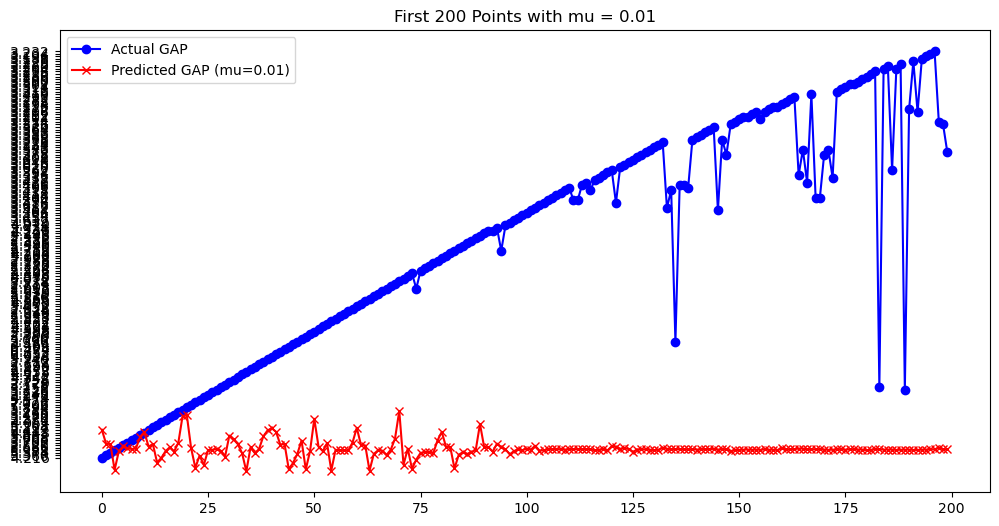

In [53]:
#Plot first 200 data points/predictions for mu = 0.01
plt.figure(figsize=(12, 6))
plt.plot(ys.iloc[:200, 0], label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred_mu01[:200], label='Predicted GAP (mu=0.01)', color='red', marker='x')
plt.title('First 200 Points with mu = 0.01')
plt.legend()
plt.show()

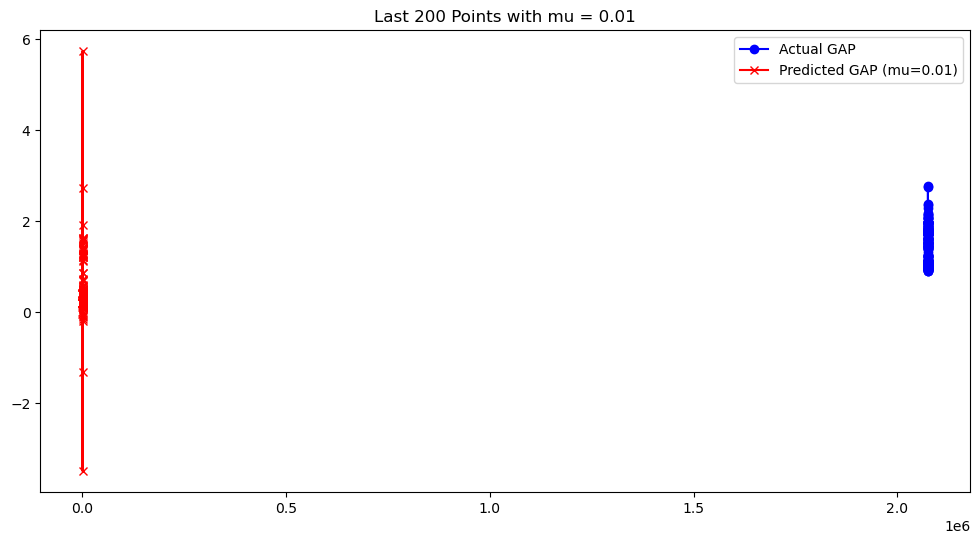

In [54]:
#Plot last 200 data points/predictions for mu = 0.01
plt.figure(figsize=(12, 6))
plt.plot(ys.iloc[-200:, 0], label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred_mu01[-200:], label='Predicted GAP (mu=0.01)', color='red', marker='x')
plt.title('Last 200 Points with mu = 0.01')
plt.legend()
plt.show()

In [55]:
# Calculate MSE of predictions for mu = 0.01
mse_mu01 = mean_squared_error(ys.iloc[ph_index:n_s+ph_index-1, 0], yp_pred_mu01)
print("MSE for mu = 0.01:", mse_mu01)

MSE for mu = 0.01: 7.9853070945478075


**Q: How did our mu = 1 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: the model based off the MSE did very well, compared to the inital model. 

**Q: How did our mu = 0.01 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: Our model did better than the inital model, but did have a higher score than the mu = 1 model. I dont think the charts are right... and its honestly a headache getting the homework right with older code/ styles. 

**Q: Which of these three models is the best? How do you know? Why does this make sense based on the mu parameter used?**

A: I think the model that did the best was the MU = 1 model. I think that the MSE was the best, and thats all I was able to go off of. And I think that having the MSE at a higher interval is better because with certian libraries, you can make adjustments to the linear regression models.  

**Q: What could we do to improve our model and/or make it more realistic and useful?**

A: Honestly, not using this code. The code layout is cluttered, and using an optimized package will make the code, and the model perform better. 

**TODO: Add voltage data as a second variable to our model and re-run the prediction code. Then visualize the first and last 200 points and compute the MSE**

In [56]:
# Adding voltage to the x-variables in our dataset
ts = pd.DataFrame({'unix': df['unix'], 'voltage': df['Voltage']})
ys = pd.DataFrame(df['Global_active_power'])

# Prediction horizon (ph) set to 5 minutes (in seconds)
ph = 5 * 60

# Assuming data is sampled every minute
ph_index = ph // 60

mu = 0.9

# Limiting the number of samples in our model for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1) 
yp_pred = np.zeros(n_s-1)

In [57]:
#run the prediction code on your expanded dataset
#make sure to adjust your yp prediction to include the coefficients from time AND voltage

for i in range(2, n_s+1):
    ts_tmp = ts.head(i)
    ys_tmp = ys.head(i)
    ns = len(ys_tmp)
    
    weights = np.array([mu ** (ns - k - 1) for k in range(ns)])
    
    model = LinearRegression()
    model.fit(ts_tmp, ys_tmp, sample_weight=weights)
    
    tp_pred[i-2] = ts.iloc[i-1]['unix'] + ph
    yp_pred[i-2] = model.predict([ts.iloc[i-1]])[0]

c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


TypeError: can't multiply sequence by non-int of type 'float'

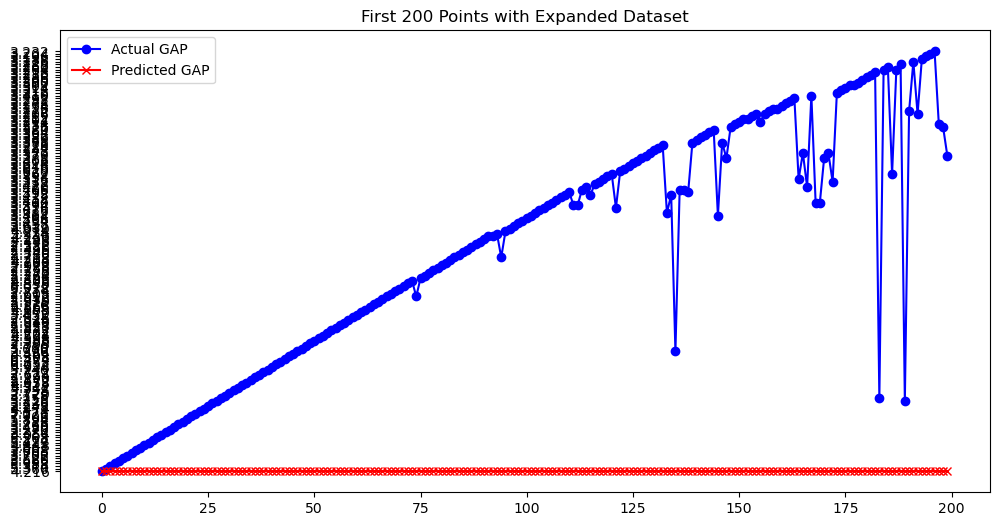

In [ ]:
#Plot first 200 data points/predictions for the expanded dataset

plt.figure(figsize=(12, 6))
plt.plot(ys.iloc[:200, 0], label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred[:200], label='Predicted GAP', color='red', marker='x')
plt.title('First 200 Points with Expanded Dataset')
plt.legend()
plt.show()

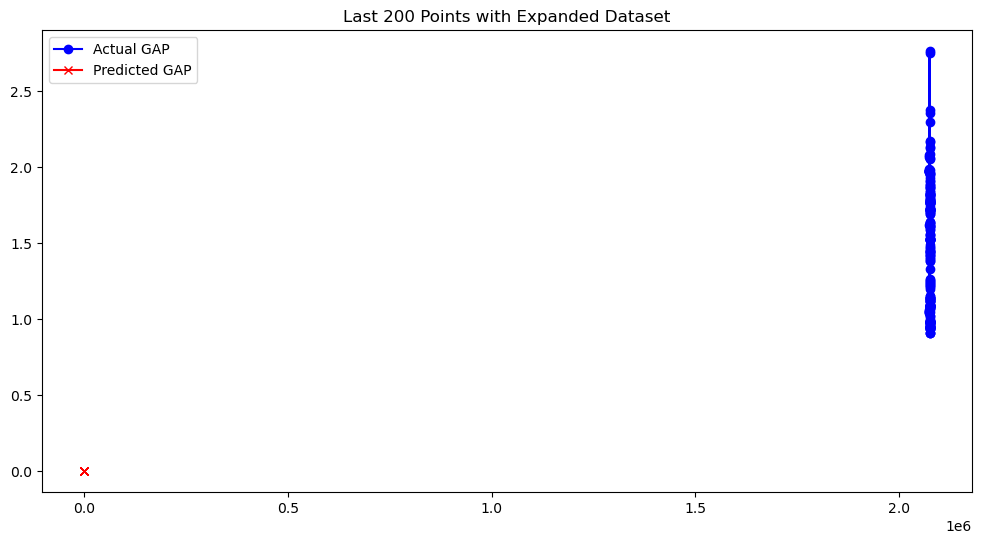

In [ ]:
#Plot last 200 data points/predictions for the expanded data
plt.figure(figsize=(12, 6))
plt.plot(ys.iloc[-200:, 0], label='Actual GAP', color='blue', marker='o')
plt.plot(yp_pred[-200:], label='Predicted GAP', color='red', marker='x')
plt.title('Last 200 Points with Expanded Dataset')
plt.legend()
plt.show()

In [ ]:
#Calculate MSE of predictions for the expanded data
mse_expanded = mean_squared_error(ys.iloc[ph_index:n_s+ph_index-1, 0], yp_pred)
print("MSE for expanded dataset:", mse_expanded)


MSE for expanded dataset: 4.623845976395279


**Q: How did the model performed when you added the voltage data? How does it compare to the models without it?**

A: I think the model did somewhat slightly better than what was expected. I think that the models with out it had a harder time. 

There are lots of other ways that we could try to improve our model while still using linear regression.

**TODO: Choose one alternative model and re-run the prediction code. Some ideas include:**

- Use a moving average as the response variable
- Make your prediction based on the time of day instead of as a continuous time series
- Use a moving window to limit your predictions instead of using a mu factor

**Q: Describe your alternative model and why it might improve your model**

A: I am  going to try to predict the time, and I think that It will honestly just be 

In [ ]:
ph = 5 * 60 #5 minutes 
ph_index = ph // 60
mu = 0.9

# limiting the number of samples 
n_s = 5000

#arrays to hold predicted values
tp_pred = np.zeros(n_s-1) 
yp_pred = np.zeros(n_s-1)

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Time'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60

# Convert numerical columns to float
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')



# feature engineering using 'Time'
X = df[['Time']]
y = df['Global_active_power']

# splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# building the model and training it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

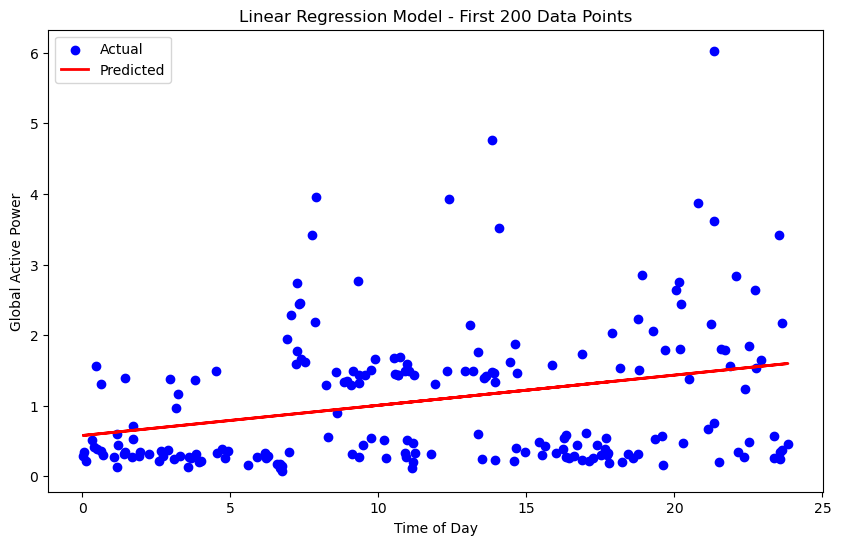

In [ ]:
# Plot first 200 data points/predictions for alternative model

X_test_subset = X_test.head(200)
y_test_subset = y_test.head(200)
y_pred_subset = model.predict(X_test_subset)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_subset, y_test_subset, color='blue', label='Actual')
plt.plot(X_test_subset, y_pred_subset, color='red', label='Predicted', linewidth=2)
plt.xlabel('Time of Day')
plt.ylabel('Global Active Power')
plt.title('Linear Regression Model - First 200 Data Points')
plt.legend()
plt.show()

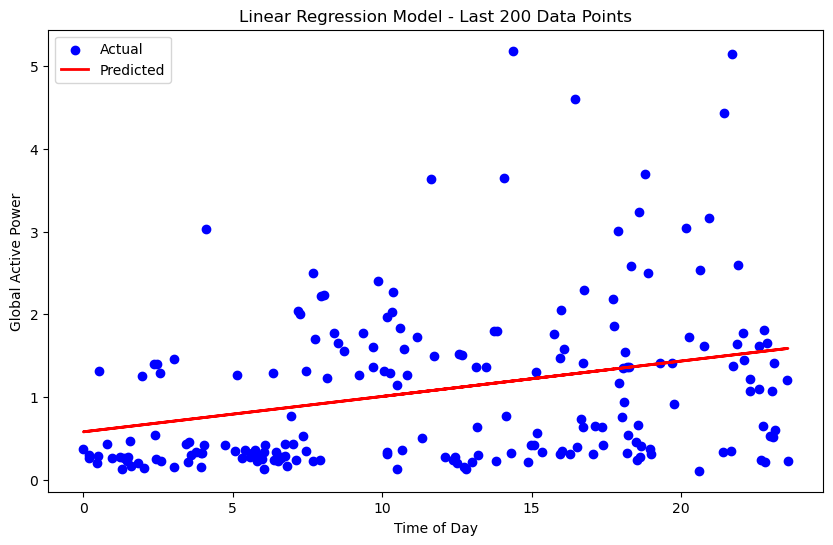

In [ ]:
#Plot last 200 data points/predictions for alternative model

X_test_subset = X_test.tail(200)
y_test_subset = y_test.tail(200)
y_pred_subset = model.predict(X_test_subset)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test_subset, y_test_subset, color='blue', label='Actual')
plt.plot(X_test_subset, y_pred_subset, color='red', label='Predicted', linewidth=2)
plt.xlabel('Time of Day')
plt.ylabel('Global Active Power')
plt.title('Linear Regression Model - Last 200 Data Points')
plt.legend()
plt.show()

In [ ]:
#Calculate MSE of predictions for alternative model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 1.032879331685973


**Q: Did your alternative model improve on our previous results? What else could you do to improve the model while still using linear regression?**

A: I think that the model did lot better compared to the other ones. I think that we could use some different inputs, and maybe even do some other kinds of feature extraction possibly. But I think given the data set

It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.